# Lesson 2 - Load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load data from a file

In [2]:
x, y = np.loadtxt('./data/lesson2.csv', delimiter=',', dtype='str', unpack=True, skiprows=1) # skiprows=1 to skip the header

In [3]:
x

array(['2007 0101 01', '2007 0102 02', '2007 0103 03', ...,
       '2021 0419 19', '2021 0420 20', '2021 0421 21'], dtype='<U12')

In [4]:
y

array(['101764.9', '101764.9', '101764.9', ..., '96434.9', '96434.9',
       '96434.9'], dtype='<U12')

In [5]:
from datetime import datetime

for i in range(len(x)):
    x[i] = datetime.strptime(x[i][0:-2].strip(), '%Y %m%d').date() # remove the last 2 characters, strip the whitespace and convert to date

In [6]:
x

array(['2007-01-01', '2007-01-02', '2007-01-03', ..., '2021-04-19',
       '2021-04-20', '2021-04-21'], dtype='<U12')

In [7]:
y = y.astype(np.float) # convert to float

In [8]:
y

array([101764.9, 101764.9, 101764.9, ...,  96434.9,  96434.9,  96434.9])

There are many repeated values for the same period of time. We can just take the first value for each one.

In [9]:
last = -1

new_x = []
new_y = []

for i in range(len(y)):
    if y[i] != last:
        last = y[i]
        new_x.append(x[i])
        new_y.append(last)

In [10]:
x = np.array(new_x, dtype='datetime64[D]')
y = np.array(new_y, dtype=np.float)

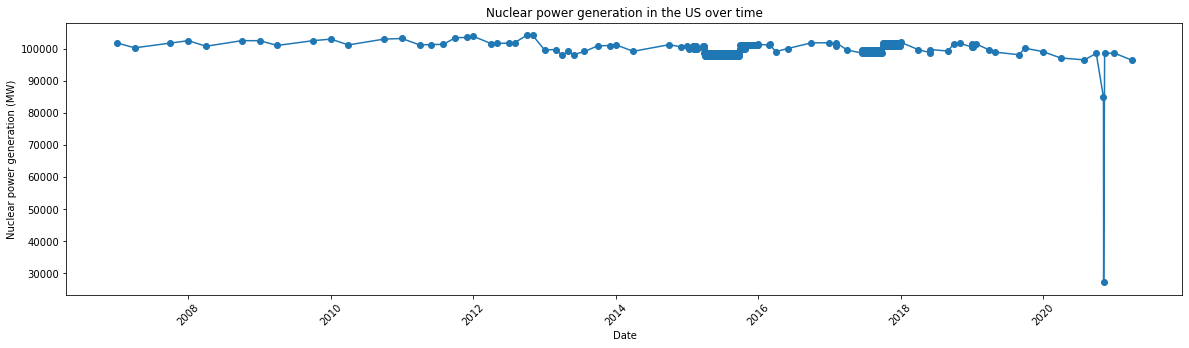

In [11]:
plt.figure(figsize=(20, 5))

# Rotate the x-axis labels
ax = plt.subplot2grid((1, 1), (0, 0))
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

plt.plot_date(x, y, linestyle='solid')

plt.title('Nuclear power generation in the US over time')
plt.xlabel('Date')
plt.ylabel('Nuclear power generation (MW)')

plt.show()

## Load data from a URL

In [12]:
import requests

symbol = 'IBM' # IBM stock symbol

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=' + symbol + '&interval=5min&apikey=demo'
r = requests.get(url)
data = r.json()

In [13]:
data.keys() # dict_keys(['Meta Data', 'Time Series (5min)'])

dict_keys(['Meta Data', 'Time Series (5min)'])

In [14]:
last_refreshed = data['Meta Data']['3. Last Refreshed']
symbol = data['Meta Data']['2. Symbol']
tymezone = data['Meta Data']['6. Time Zone']

In [17]:
from datetime import datetime

date, openp, highp, lowp, closep, volume = [], [], [], [], [], []

for key, value in data['Time Series (5min)'].items():
    open_price, highp_price, low_price, close_price, volume_item = value.values()
    date.append(datetime.strptime(key, '%Y-%m-%d %H:%M:%S'))
    openp.append(float(open_price))
    highp.append(float(highp_price))
    lowp.append(float(low_price))
    closep.append(float(close_price))
    volume.append(float(volume_item))

date = np.array(date, dtype='datetime64[m]')    
openp = np.array(openp, dtype=np.float)
highp = np.array(highp, dtype=np.float)
lowp = np.array(lowp, dtype=np.float)
closep = np.array(closep, dtype=np.float)
volume = np.array(volume, dtype=np.float)

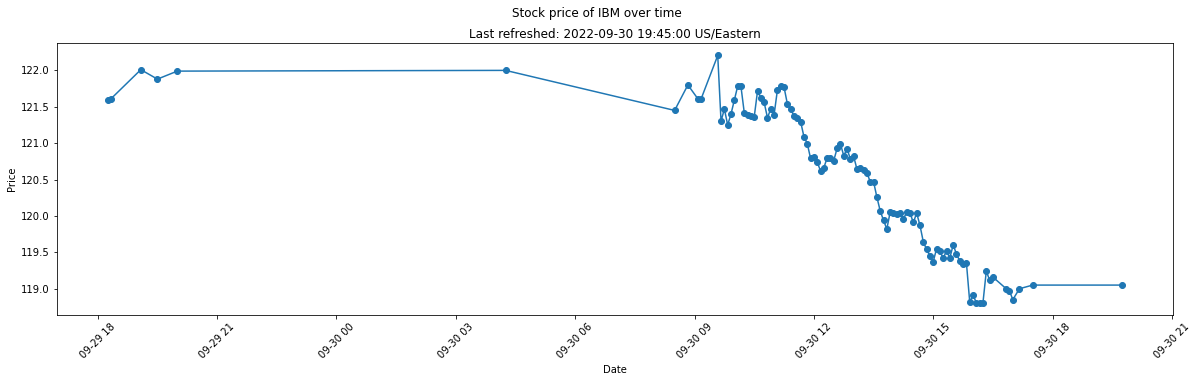

In [20]:
plt.figure(figsize=(20, 5))

# Rotate the x-axis labels
ax = plt.subplot2grid((1, 1), (0, 0))
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

plt.plot_date(date, closep, linestyle='solid')


plt.suptitle('Stock price of ' + symbol + ' over time')
plt.title('Last refreshed: ' + last_refreshed + ' ' + tymezone)
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()